Lucky Bag

Q)랜덤으로 담겨있는 생선의 확률 구하기

특성은 길이, 높이, 두께, 대각선, 무게 사용가능

ex)도미일 확률:72%,  빙어일 확률:16%

확률 계산하기: k-최근접 이웃 분류기


In [ ]:
import pandas as pd
fish = pd.read_csv("/content/fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


타깃 데이터: Species

판다스 unique()함수 사용

In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


특성 데이터 ->데이터프레임으로 반환 후 넘파이 배열을 만듬

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()#입력데이터
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()#타깃데이터
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


훈련세트와 테스트세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

StandardScaler 클래스를 사용하여 표준화 전처리 하기

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
#표준화 fit -> transform

k-최근접 이웃의 다중 분류

다중분류: 타깃 데이터에 2개 이상의 클래스가 포함된것..

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)#최근접 이웃개수는 3개!
kn.fit(train_scaled,train_target)#사이킷런이 문자열을 정수로 알아서 바꿔줌
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)#_:train 타켓으로부터 학습한 값. 알파벳순서대로 나옴

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


사이킷런의 분류모델은 predict_proba()메서드로 클래스별 확률값을 알 수있다

3개의 최근접 이웃을 사용했기 때문에 확률은 다음과 같이 4가지로 만 나온다

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])#출력순서는 classes_ 속성과 같음
print(np.round(proba,decimals=4))# round는 반올림, decimals는 소수점 자리수

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])#4번째 샘플의 3개의 최근접 이웃클래스
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀 : 분류모델

z = aX무게 + bX길이 + cX대각선 + dX높이 + eX두께 + f

z값을 그대로 사용하면 회귀가 됨

확률의 개념인 0~1로 바꾸기 위해 시그모이드함수, 로지스틱함수를 사용

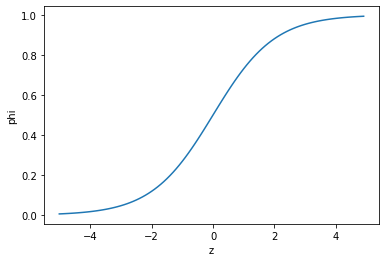

In [ ]:
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


이진분류에서는 시그모이드 함수의 출력값이 0.5보다 크면 양성클래스, 0.5이하이면 음성클래스로 판단

도미와 빙어를 이용해 이진분류를 수행해보자

In [ ]:
bream_smelt_indexes = (train_target == "Bream")|(train_target == "Smelt") #or연산자를 이용해 도미와 빙어에 대한 행만 선택
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

훈련을 진행후 train_bream_smelt에 있는 처음 5개의 샘플을 예측해서 출력

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) #1열: 음성클래스, 2열:양성클래스

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


1열은 음성클래스(도미, Bream), 2열은 양성클래스(빙어,Smelt)

In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


로지스틱회귀 계수 확인

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


로지스틱 회귀의 방정식은 

z = -0.4Xweight + -0.5Xlength + -0.6Xdiagonal + 1.0Xheight + -0.7Xwidth -2.1

LogisticRegression 모델로 z값 계산가능

decision_function()을 통해 z값 출력가능

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) #이 z값들을 시그모이드 함수에 대입하면 확률을 얻을 수 있다

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


이는 predict_proba()메소드 출력의 두 번째 열의 값과 동일 하다

즉 decision_function()에서 양성 클래스에 대한 z값을 반환한다

In [ ]:
from scipy.special import expit #scipy라이브러리에 시그모이드 함수(expit) 존재
print(expit(decisions))#확률값

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


이진분류를 통한 로지스틱 회귀모델 훈련 완료!

다중분류(로지스틱 회귀)

반복의 기본값은 100이고 충분하게 훈련시키기 위해 1000으로 늘렷다

C값은 분류모델시 규제변수. C값이 높을수록 규제강도는 약하다(L2)

C의 기본값은 1이다

In [ ]:
lr = LogisticRegression(C=20, max_iter = 1000)#반복횟수 조절, C값은 L2규제를 기본적으로 적용
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))#정확도
print(lr.score(test_scaled,test_target))#overfitting, underfitting -> X

0.9327731092436975
0.925


테스트세트의 처음 5개 샘플에 대한 예측과 확률

In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


7개의 행 5개의 열

7개->클래스, 5개-> 특성

클래스마다 선형함수가 만들어짐 z값이 7개 만들어짐

가장 큰 값이 예측클래스

이진분류를 7번 실행-> 다중분류

z값을 확률로 바꾸기

->7개의 시그모이드 합=1 <안됨>

->소프트맥스함수를 사용 다중분류의 경우


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


로지스틱회귀 다중분류의 경우 소프트맥스 함수를 사용하여야 한다

In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis =1)
print(np.round(proba, decimals =3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


proba배열과 정확히 일치-> 7개의 생선 확률예측 모델훈련

시그모이드->이진분류

소프트맥스->다중분류

이진분류에서는 시그모이드함수를 사용하여 z를 0~1사이 값으로 변환

다중분류에서는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환

요약

<이진분류>

k최근접 이웃을 통해 분류하고 확률을 구할수 있다 허나 이는 확률값이 다양하지 않는 단점이 있다

로지스틱회귀:분류모델. 선형방정식 학습 = z값 ->시그모이드 함수를 통해 확률값을 구한다
0.5보다 크면 양성클래스 0.5보다 작으면 음성클래스 허나 z값의 0을 기준으로 분류할수 있다

단지 z값만 보고 판단-> dicision_function-> predict

시그모이드함수 사용 ->predict_proba

<다중분류>

클래스별로 선형함수 하나씩 학습
1. 로지스틱회귀 모델 학습
2. predict_proba 각 샘플마다 확률 출력 클래스 개수만큼 출력 총합 = 1
3. 소프트맥스함수를 사용 확률총합 = 1
4. 문자열 그대로 타깃값을 넣어도 됨. 알파벳 순서대로 할당됨